<a href="https://colab.research.google.com/github/LidiiaMelnyk95/FSU_Jena_scripts/blob/main/stance_sentiment_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.utils import resample


df = pd.read_csv('/content/cnn_sentiment_new.csv', sep = ',')

In [ ]:
df['Sentiment'] = df['Sentiment'].replace({'neutral': 0, 'negative':1, 'positive':2})

In [ ]:
df['Label'].value_counts()

neutral     712
negative    174
positive    113
Name: Label, dtype: int64

In [ ]:
class SentimentBalancer:
    def __init__(self, df, sentiment_column, label_column):
        self.df = df
        self.sentiment_column = sentiment_column
        self.label_column = label_column

    def _oversample_class(self, df_class, count_majority_class):
        return resample(df_class, n_samples=count_majority_class, replace=True, random_state=42)

    def balance_sentiment_classes(self):
        sentiment_counts = self.df[self.sentiment_column].value_counts()
        count_majority_class = sentiment_counts.max()

        df_majority_class = self.df[self.df[self.sentiment_column] == 'neutral']
        df_minority_class = self.df[self.df[self.sentiment_column] == 'positive']
        df_middle_class = self.df[self.df[self.sentiment_column] == 'negative']

        df_class_oversample = self._oversample_class(df_minority_class, count_majority_class)
        df_mid_sample = self._oversample_class(df_middle_class, count_majority_class)

        df_balanced_os = pd.concat([df_class_oversample, df_majority_class, df_mid_sample], axis=0)

        return df_balanced_os

    def balance_label_classes(self):
        label_counts = self.df[self.label_column].value_counts()
        count_majority_class = label_counts.max()

        df_majority_class = self.df[self.df[self.label_column] == 'neutral']
        df_minority_class = self.df[self.df[self.label_column] == 'positive']
        df_middle_class = self.df[self.df[self.label_column] == 'negative']

        df_class_oversample = self._oversample_class(df_minority_class, count_majority_class)
        df_mid_sample = self._oversample_class(df_middle_class, count_majority_class)

        df_balanced_os_stance = pd.concat([df_class_oversample, df_majority_class, df_mid_sample], axis=0)

        return df_balanced_os_stance

    def combine_and_return(self):
        df_balanced_os = self.balance_sentiment_classes()
        df_balanced_os_stance = self.balance_label_classes()
        return pd.concat([df_balanced_os, df_balanced_os_stance], join='inner')

# Example usage:
sentiment_balancer = SentimentBalancer(df, sentiment_column='Sentiment', label_column='Label')
df_combined_balanced = sentiment_balancer.combine_and_return()


In [ ]:
#create a confusion metrics
import itertools

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes = None,
                          figsize = (10,10), text_size = 15):

  #create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  #let's prettify it
  fig, ax = plt.subplots(figsize = figsize)
  #create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  #set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  #label the axes
  ax.set(title = 'confusion matrix',
         xlabel = 'sentiment label',
         ylabel = 'stance label',
         xticks = np.arange(n_classes),
         yticks = np.arange(n_classes),
         xticklabels = labels,
         yticklabels = labels)

  #set threshold for different colors
  threshold = (cm.max() + cm.min())/2

  #plot the text on each sell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
        horizontalalignment = 'center',
        color = 'white' if cm[i,j]> threshold else 'black',
        size = text_size)

In [ ]:
class_names = ['negative', 'neutral', 'positive']

In [ ]:
df.head(10)

,Unnamed: 0,Comment,Label,Sentiment
0,0,@docdespair agitation is not an action that ch...,neutral,negative
1,1,@Kölsch Mädche bzw gibt es auf deutsch einfach...,neutral,negative
2,2,@Aaron Decker na dann blicken wir mal in das J...,neutral,negative
3,3,"Ja da schlucken sie,über ihren eigenen Dung. D...",negative,negative
4,4,Ich versteh es einfach nicht wozu man für sowa...,neutral,negative
5,5,hi ich habe gehört Amir Arabpour möchte Sex mi...,neutral,negative
6,6,@Uvuvuvwevwe Onyetenwevwe Ugwemubwem Osas da ...,neutral,negative
7,7,"@WhoisAry Ganz einfach, in dem kontext war es...",negative,negative
8,8,"@Fußball,Games and more YouTube Da sind dir ab...",neutral,negative
9,9,P. S. Hübsche Frauen....,neutral,negative


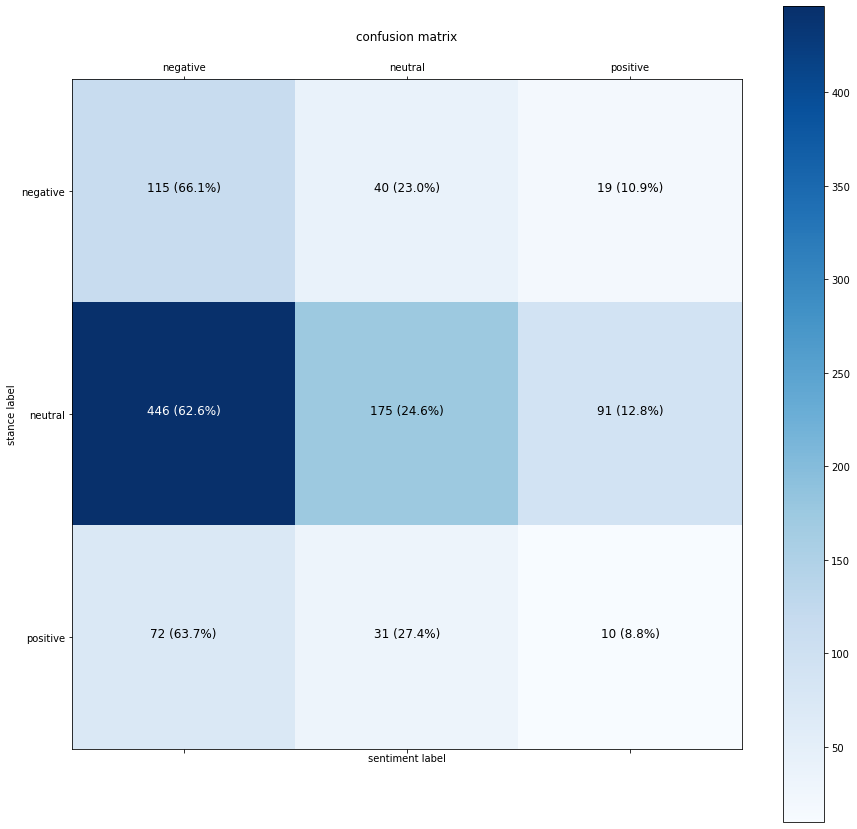

In [ ]:
make_confusion_matrix(df['Label'].values, df['Sentiment'].values, classes = class_names, figsize = (15,15), text_size = 12)

In [ ]:
sklearn.metrics.cohen_kappa_score(df['Label'].values, df['Sentiment'].values
)

0.001210045956000605